# 2- KNN Regression

- Prepared By: Ammar Nassan Alhaj Ali.
- Date: 2020-10-14.
- References: 1-introduction to machine learning with python a guide for data scientists 2017 (Andreas C. Müller and Sarah Guido).



- There is also a regression variant of the k-nearest neighbors algorithm. Again, let’s
start by using the single nearest neighbor, this time using the wave dataset. We’ve
added three test data points as green stars on the x-axis.

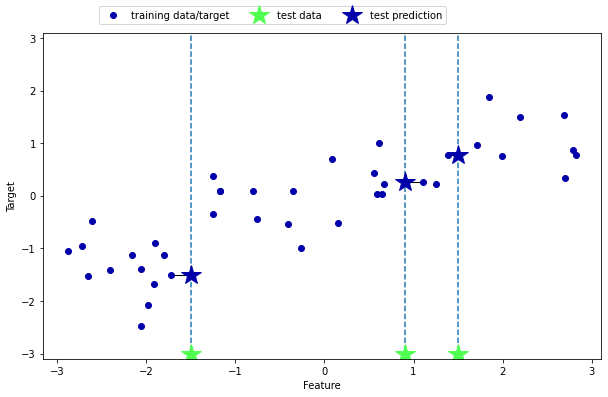

In [105]:
import mglearn
import matplotlib.pyplot as plt
mglearn.plots.plot_knn_regression(n_neighbors=1)

-We can use more than the single closest neighbor for regression. When using
multiple nearest neighbors, the prediction is the average, or mean, of the relevant
neighbors

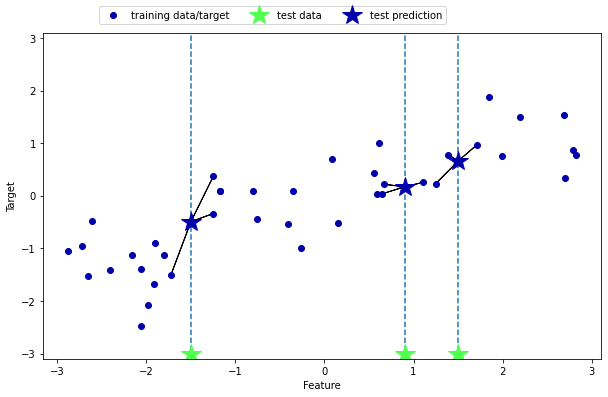

In [106]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [107]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)
# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [108]:
print("Test set predictions:\n{}".format(reg.predict(X_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


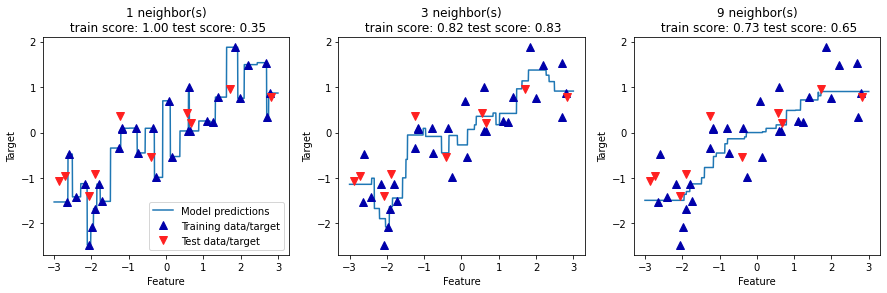

In [109]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
# make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors, reg.score(X_train, y_train),reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
    axes[0].legend(["Model predictions", "Training data/target","Test data/target"], loc="best")